<a href="https://colab.research.google.com/github/smoolya17/python_getting_started_project/blob/master/tvarit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.  Step 1 Importing Libraries**.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
%matplotlib inline

# **2. Loading the dataset from google drive**

In [0]:

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# **3. Reading the Dataset and loading into variable data**

In [0]:
data = pd.read_csv("/content/drive/My Drive/challenge_data_20.csv")
data.head()

,time,operating_hours,fuel_consumption(liter),engine_id
0,2017-12-19,3726,3404.8,8331744407
1,2017-12-20,3746,3865.6,8331744407
2,2017-12-21,3748,3891.2,8331744407
3,2017-12-22,3768,3840.0,8331744407
4,2017-12-23,3776,3891.2,8331744407


# **4.  Setting the Figsize of figure of all plots**

In [0]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


# **5.  Converting time to datetime function so as to later plot using the date as an index**

In [0]:
data.index = pd.to_datetime(data['time'])
data.head()

,time,operating_hours,fuel_consumption(liter),engine_id
time,,,,
2017-12-19,2017-12-19,3726,3404.8,8331744407
2017-12-20,2017-12-20,3746,3865.6,8331744407
2017-12-21,2017-12-21,3748,3891.2,8331744407
2017-12-22,2017-12-22,3768,3840.0,8331744407
2017-12-23,2017-12-23,3776,3891.2,8331744407


# **Rearranging the Dataset in the required format**

In [0]:
df = data[['engine_id','time','operating_hours','fuel_consumption(liter)']]
df.head()

,engine_id,time,operating_hours,fuel_consumption(liter)
time,,,,
2017-12-19,8331744407,2017-12-19,3726,3404.8
2017-12-20,8331744407,2017-12-20,3746,3865.6
2017-12-21,8331744407,2017-12-21,3748,3891.2
2017-12-22,8331744407,2017-12-22,3768,3840.0
2017-12-23,8331744407,2017-12-23,3776,3891.2


# **Selecting One Engine so that the same model can be tested for remaining 20 engines**

In [0]:
df1 = df[df.engine_id==8331744407]
df1.head()

,engine_id,time,operating_hours,fuel_consumption(liter)
time,,,,
2017-12-19,8331744407,2017-12-19,3726,3404.8
2017-12-20,8331744407,2017-12-20,3746,3865.6
2017-12-21,8331744407,2017-12-21,3748,3891.2
2017-12-22,8331744407,2017-12-22,3768,3840.0
2017-12-23,8331744407,2017-12-23,3776,3891.2


# **Loading the Time series data into variable 'ts'**

In [0]:
ts=df1['operating_hours']

Reading the problem statement I performed a basic exploratory data analysis for a single engine:8331744407.

Following are the steps to perform this analysis:
1. Reading the file from the appropriate path.
2. Being a time series problem, I needed to set the datetime format of the column time to 'yyyy-mm-dd hh:mm:ss' so that I could plot it
3. Subsetted the engine id to a particular engine and obtained a summary using describe(). The summary gave me an idea of a clean data.
4. Now using matplotlib I plotted time vs. operating_hours 
5. Then to find the hours operated in a single day, I have used the diff function and plotted the same.


For checking stationarity of the timeseries we use  methods which are not visually dependant.

3. How to Check Stationarity of a Time Series?

We can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

Constant Mean
Constant Variance
An Autocovariance that does not depend on time.

The data can be plotted by:

Text(0,0.5,'operating_hours')

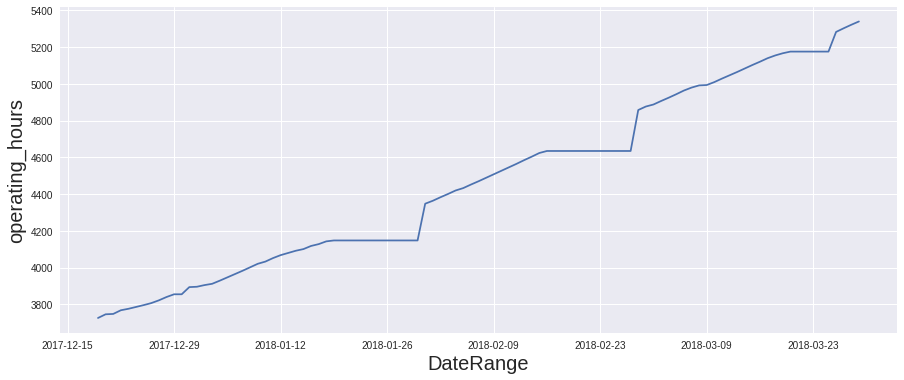

In [0]:
plt.plot(ts)
plt.xlabel('DateRange', fontsize=20)
plt.ylabel('operating_hours',fontsize=20)

# Checking Stationarity of Variables

**Plotting Rolling Statistics**:

We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

The above plot shows that for a particular engine we see a pattern of sudden spikes at regular intervals of briefly 1 month. There is a seasonality pattern seen here where, at the end of the month, the engine operates for more operating hours. Also note that operating hours of the engine is positively correlated to the fuel consumption.

**Dickey-Fuller Test:**

This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=7)
    rolstd = pd.rolling_std(timeseries, window=7)
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


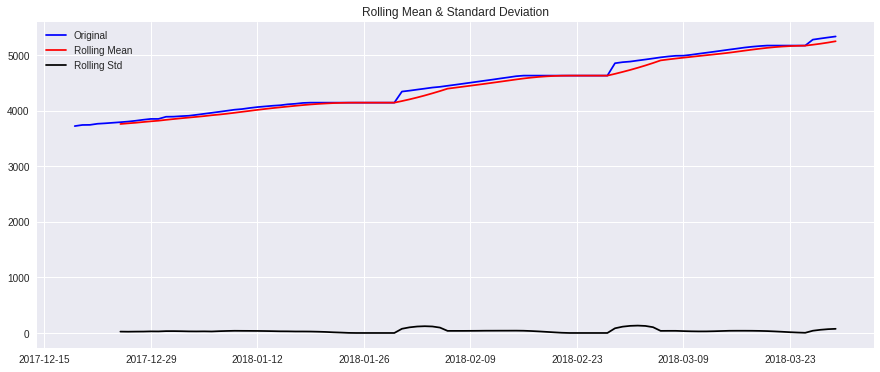

Results of Dickey-Fuller Test:
Test Statistic                   0.379529
p-value                          0.980713
#Lags Used                       0.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64


In [0]:
test_stationarity(ts)

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values. 

Next, we’ll discuss the techniques that can be used to take this TS towards stationarity.

# Estimating & Eliminating Trend

One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

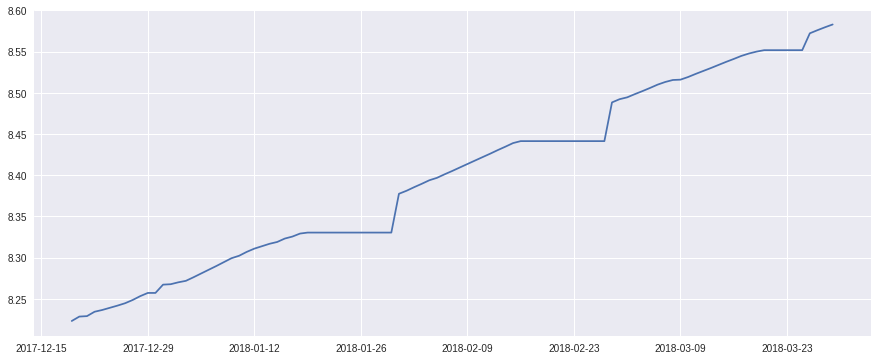

In [0]:
ts_log = np.log(ts)
plt.plot(ts_log)

In this simpler case, it is easy to see a forward trend in the data.Alsoit is very intuitive as no presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

1.  Aggregation – taking average for a time period like monthly/weekly averages
2.  Smoothing – taking rolling averages
3.  Polynomial Fitting – fit a regression model

I will discuss smoothing here . Smoothing refers to taking rolling estimates, i.e. considering the past few instances. There are can be various ways but I will discuss two of those here.

## Moving average
In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """Entry point for launching an IPython kernel.


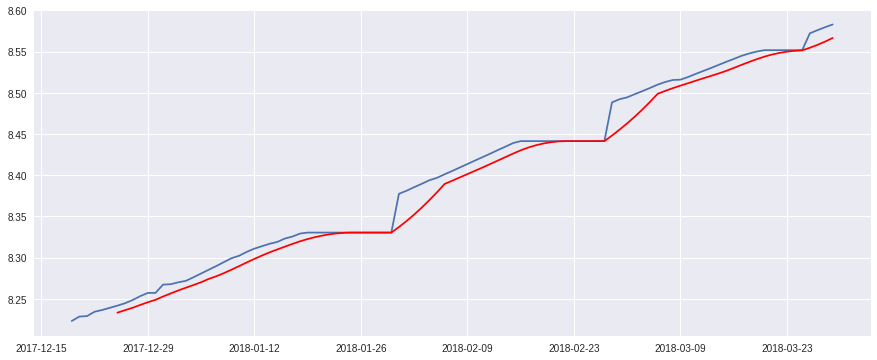

In [0]:
moving_avg = pd.rolling_mean(ts_log,7)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. Lets subtract this from the original series. 

Note that since we are taking average of last 7 values, rolling mean is not defined for first 6 values. This can be observed as:

In [0]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

time
2017-12-19         NaN
2017-12-20         NaN
2017-12-21         NaN
2017-12-22         NaN
2017-12-23         NaN
2017-12-24         NaN
2017-12-25    0.008560
2017-12-26    0.008381
2017-12-27    0.009445
2017-12-28    0.010679
2017-12-29    0.011316
2017-12-30    0.008358
Name: operating_hours, dtype: float64

Notice the first 11 being Nan. Lets drop these NaN values and check the plots to test stationarity.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


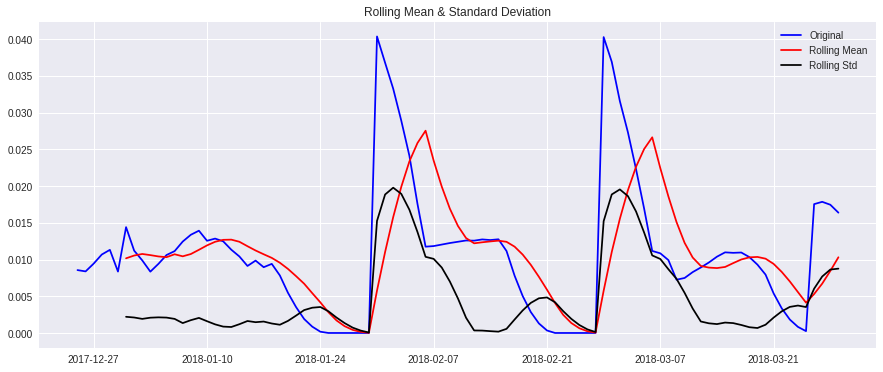

Results of Dickey-Fuller Test:
Test Statistic                 -3.649618
p-value                         0.004880
#Lags Used                      0.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [0]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take weekly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. Find details here. This can be implemented in Pandas as:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=3,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


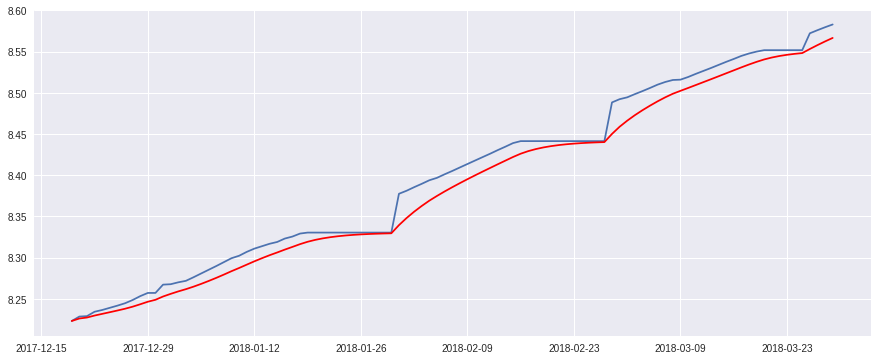

In [0]:
expwighted_avg = pd.ewma(ts_log, halflife=3)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay. Now, let’s remove this from series and check stationarity:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


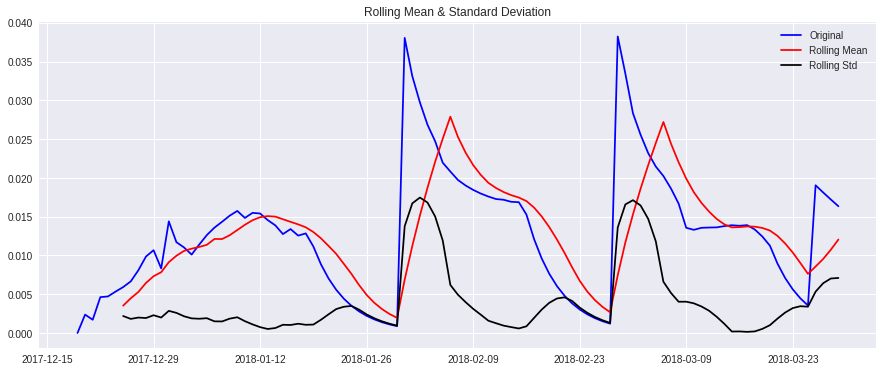

Results of Dickey-Fuller Test:
Test Statistic                  -3.866304
p-value                          0.002297
#Lags Used                       0.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64


In [0]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

# Eliminating Trend and Seasonality

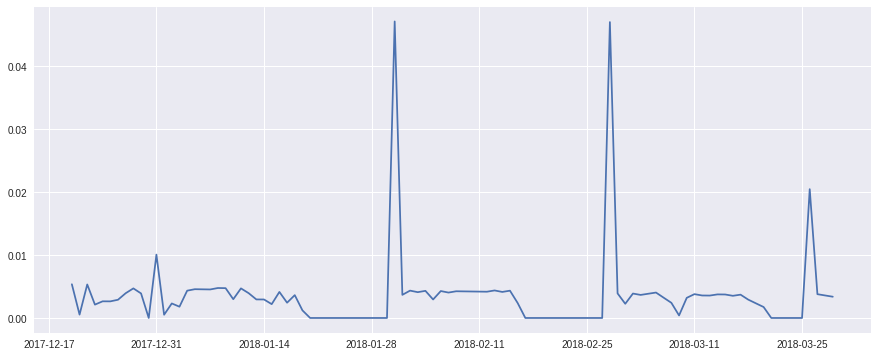

In [0]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

This appears to have reduced trend considerably. To verify using our plots:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


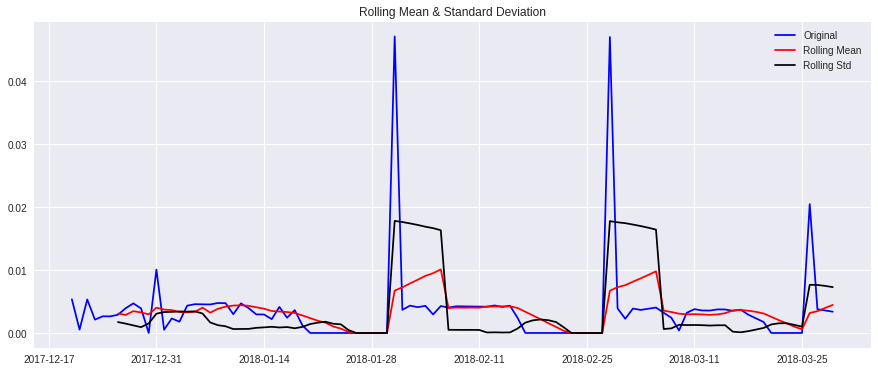

Results of Dickey-Fuller Test:
Test Statistic                -9.980385e+00
p-value                        2.122435e-17
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


In [0]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 1% critical value, thus the TS is stationary with 99% confidence. We can also take second or third order differences which might get even better results in certain applications. I leave it to you to try them out.

## **Decomposing**
In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. I’ll skip the statistics and come to the results:

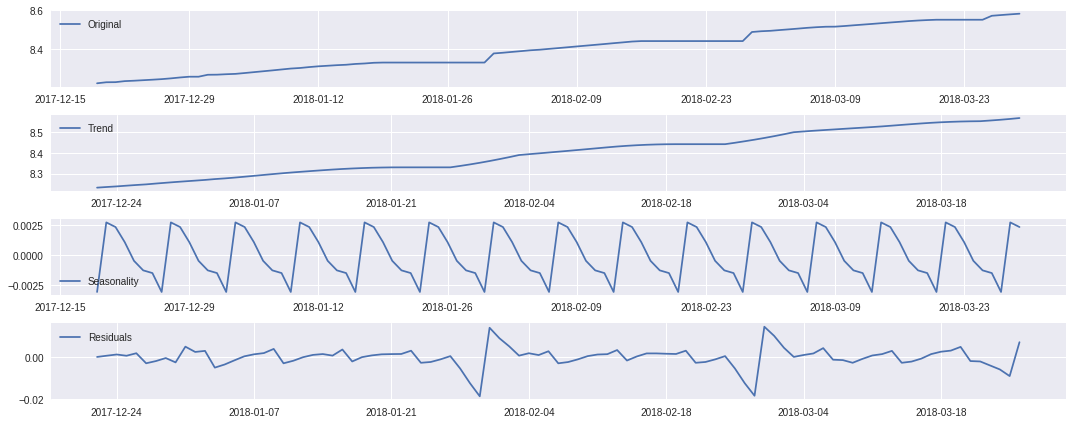

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and \nwe can model the residuals. Lets check stationarity of residuals:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


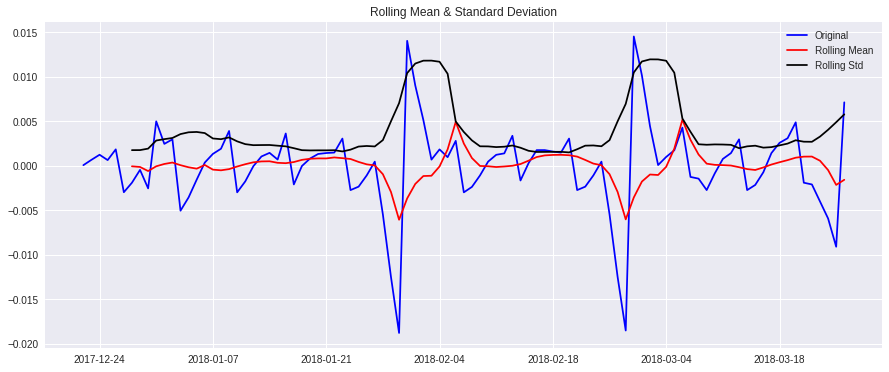

Results of Dickey-Fuller Test:
Test Statistic                -7.175515e+00
p-value                        2.733840e-10
#Lags Used                     2.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


In [0]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. Also, you should note that converting the residuals into original values for future data in not very intuitive in this case.

# **Forecasting a Time Series**

Having performed the trend and seasonality estimation techniques, there can be two situations:

1.   A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
2.   A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.

1.   Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
2.   Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
3.   Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

The ACF and PACF plots for the TS after differencing can be plotted as:

In [0]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=30)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

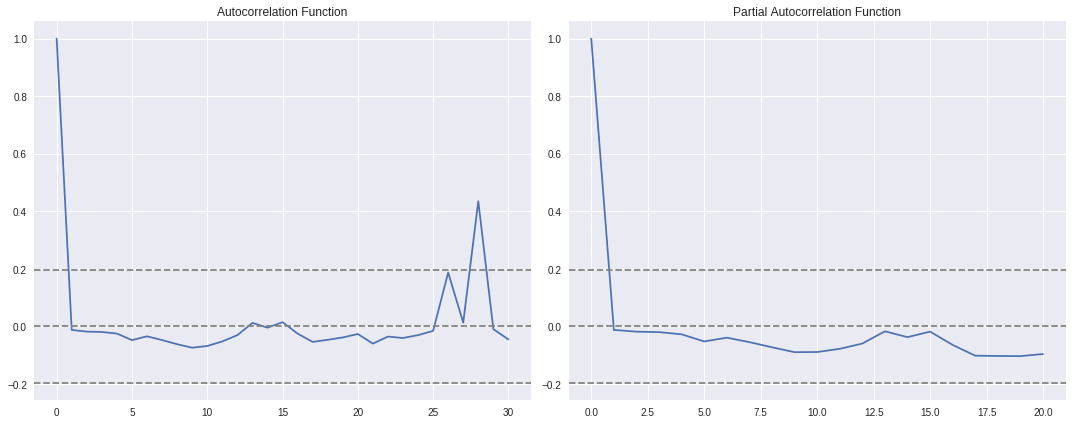

In [0]:
#Plot ACF: 

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

We need to load the ARIMA model first:

The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q). Let model the 3 cases

# **AR Model**

In [0]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5,1,'RSS: 0.0045')

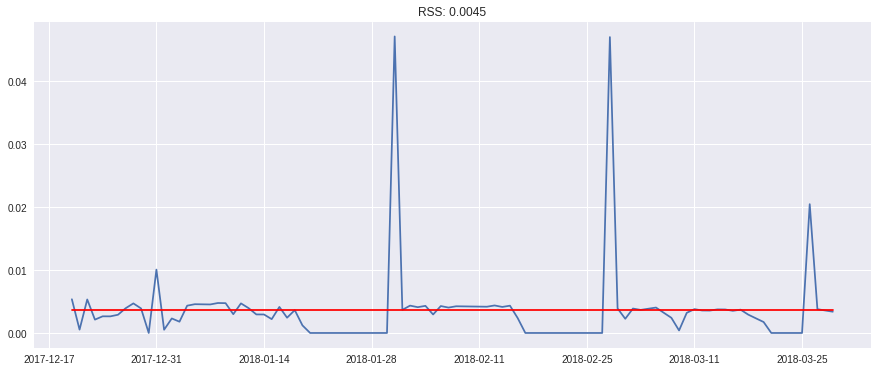

In [0]:
model = ARIMA(ts_log, order=(0, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# MA Model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 0.0045')

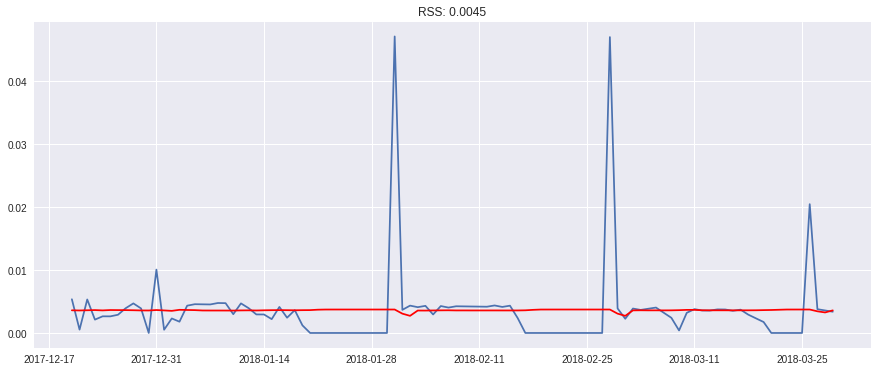

In [0]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# Combined Model

In [0]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

ValueError: ignored

# Taking it back to original scale

In [0]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())


predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA_log.head()

time
2017-12-19    14.543113
2017-12-20     8.223100
2017-12-21     8.229310
2017-12-22     8.229012
2017-12-23     8.235088
dtype: float64


time
2017-12-19    22.766204
2017-12-20    16.446190
2017-12-21    16.452401
2017-12-22    16.452103
2017-12-23    16.458178
dtype: float64

Text(0.5,1,'RMSE: 767675643.3383')

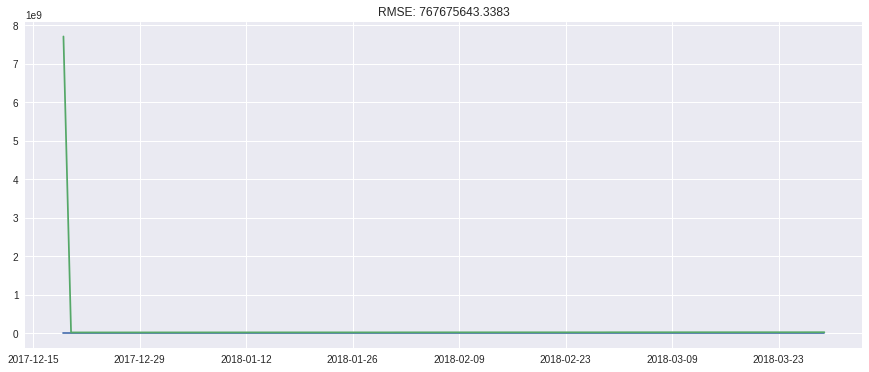

In [0]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))